In [176]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler as MM
from sklearn.metrics import mean_squared_error as MSE, mean_absolute_error as MAE, r2_score   #MSE-average of the squared differences between predicted and actual values, penalizes larger errors more than smaller ones #MAE-average of the absolute differences between predicted and actual values. Straightforward measure of prediction accuracy.
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential as sq    #allows us to build a linear stack of layers in Keras.
from tensorflow.keras.layers import LSTM, Dense, Dropout    #LTSM-used for adding long short term memory units; Dense-fully connected neural network layer;Dropout-used to prevent overfitting by randomly setting a fraction of input units to 0 at each update during training time
from tensorflow.keras.callbacks import EarlyStopping as ES, ReduceLROnPlateau as rLRp    #ES-stops training when a monitored metric has stopped improving; rLRp-reduces the learning rate when a metric has stopped improving

In [177]:
class Data :

    def __init__(self) :
        self.dataframe = pd.DataFrame([])

    #Read data from CSV dataset(s)
    def read(self, filename : str) :
        """Reads values/data from CSV files into dataframe"""
        if os.path.exists(filename) :
            self.dataframe = pd.read_csv(filename)
            print(f"Data successfully read from {filename}.")
        else :
            print(f"Error: The file {filename} does not exist.")

    #Check for null values in the dataset(s)
    def check_null_values(self) :
        """Checks for null values in the dataframe."""
        print("Null Values Before Cleaning:")
        print(self.dataframe.isnull().sum())

    #Cleaning the dataset :
    def clean_dataset(self) :
        """Cleans the dataset by removing null values"""
        if self.dataframe is not None :
            original_shape = self.dataframe.shape #store the original shape of the DataFrame
            self.dataframe = self.dataframe.dropna() #drop all rows with null values; dropna() is a Pandas method that, by default, drops all rows that contain at least one null value.
            cleaned_shape = self.dataframe.shape #store the cleaned shape of DataFrame
            print(f"Dataset cleaned. Original shape: {original_shape}, Cleaned shape: {cleaned_shape}.")
        else:
            print("Error: No data to clean. Please read a dataset first.")

    # Normalize the data
    def normalize(self):
        """Normalizes numeric columns in the dataframe"""
        # Select columns to scale
        columns_to_scale = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

        # Ensure all specified columns are in the DataFrame
        columns_to_scale = [col for col in columns_to_scale if col in self.dataframe.columns]

        if columns_to_scale:
            # Select the data to scale
            data_to_scale = self.dataframe[columns_to_scale]

            # Initialize the MinMaxScaler
            self.scaler = MM()

            # Fit and transform the data
            scaled_data = self.scaler.fit_transform(data_to_scale)

            # Update the DataFrame with the scaled data
            self.dataframe[columns_to_scale] = scaled_data

            print("Data successfully normalized:")
            print(self.dataframe.head())
        else:
            print("Error: No columns to normalize. Please ensure the dataframe contains the necessary columns.")

    def visualize_open(self) :
      """Plot graph for open stock values v/s date"""
      if 'Date' in self.dataframe.columns and 'Open' in self.dataframe.columns:
            self.dataframe['Date'] = pd.to_datetime(self.dataframe['Date'])
            plt.figure(figsize=(14, 7))
            plt.plot(self.dataframe['Date'], self.dataframe['Open'], label='Open Stock Prices')
            plt.title('Open Stock Prices Over Time')
            plt.xlabel('Date')
            plt.ylabel('Open Stock Price')
            plt.legend()
            plt.show()
      else:
        print("Date and/or Open column not found in the dataframe")

    def visualize_close(self) :
      """Plot graph for close stock values v/s date"""
      if 'Date' in self.dataframe.columns and 'Close' in self.dataframe.columns :
            self.dataframe['Date'] = pd.to_datetime(self.dataframe['Date'])
            plt.figure(figsize=(14, 7))
            plt.plot(self.dataframe['Date'], self.dataframe['Close'], label='Close Stock Prices')
            plt.title('Close Stock Prices Over Time')
            plt.xlabel('Date')
            plt.ylabel('Close Stock Price')
            plt.legend()
            plt.show()
      else:
          print("Date and/or Close column not found in the dataframe")


    def print_head(self):
        """Prints the head of the dataframe."""
        print("Head of the DataFrame:")
        print(self.dataframe.head())

    def print_description(self):
        """Prints the description of the dataframe."""
        print("\nDescription of the DataFrame:")
        print(self.dataframe.describe())


In [178]:
data = Data()

In [179]:
data.read('sample_data/MBG.DE.csv')

Data successfully read from sample_data/MBG.DE.csv.


In [180]:
data.check_null_values()

Null Values Before Cleaning:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [181]:
data.clean_dataset()

Dataset cleaned. Original shape: (7069, 7), Cleaned shape: (7069, 7).


In [182]:
data.print_head()

Head of the DataFrame:
         Date       Open       High        Low      Close  Adj Close   Volume
0  1996-10-30  37.848667  37.878437  37.521210  37.550976  10.742869  1640521
1  1996-10-31  37.635983  38.057022  37.635983  38.052780  10.886427  1908031
2  1996-11-01  38.273941  38.614124  38.082554  38.231346  10.937516  2423211
3  1996-11-04  38.273941  38.609882  38.273941  38.529037  11.022679  1284644
4  1996-11-05  38.694889  39.251991  38.507828  39.251991  11.229506  2105206


In [183]:
data.print_description()


Description of the DataFrame:
              Open         High          Low        Close    Adj Close  \
count  7069.000000  7069.000000  7069.000000  7069.000000  7069.000000   
mean     46.350177    46.916535    45.739251    46.325947    24.524741   
std      14.850556    14.960636    14.737774    14.835210    14.561241   
min      14.688660    15.108692    14.306056    14.505675     6.404110   
25%      33.906185    34.405235    33.394661    33.926979    13.887863   
50%      45.064075    45.596397    44.465218    45.039124    18.736469   
75%      57.495956    58.122513    56.800034    57.495956    32.051586   
max      85.521103    92.282379    84.542969    85.052834    71.070671   

             Volume  
count  7.069000e+03  
mean   5.658307e+06  
std    4.141366e+06  
min    0.000000e+00  
25%    3.122631e+06  
50%    4.809738e+06  
75%    7.042474e+06  
max    7.396760e+07  


In [184]:
data.normalize()

Data successfully normalized:
         Date      Open      High       Low     Close  Adj Close    Volume
0  1996-10-30  0.326969  0.295045  0.330526  0.326665   0.067094  0.022179
1  1996-10-31  0.323966  0.297360  0.332160  0.333778   0.069314  0.025795
2  1996-11-01  0.332973  0.304578  0.338519  0.336309   0.070104  0.032760
3  1996-11-04  0.332973  0.304523  0.341243  0.340529   0.071421  0.017368
4  1996-11-05  0.338916  0.312844  0.344573  0.350777   0.074620  0.028461


In [185]:
data.print_head()
data.print_description()

Head of the DataFrame:
         Date      Open      High       Low     Close  Adj Close    Volume
0  1996-10-30  0.326969  0.295045  0.330526  0.326665   0.067094  0.022179
1  1996-10-31  0.323966  0.297360  0.332160  0.333778   0.069314  0.025795
2  1996-11-01  0.332973  0.304578  0.338519  0.336309   0.070104  0.032760
3  1996-11-04  0.332973  0.304523  0.341243  0.340529   0.071421  0.017368
4  1996-11-05  0.338916  0.312844  0.344573  0.350777   0.074620  0.028461

Description of the DataFrame:
              Open         High          Low        Close    Adj Close  \
count  7069.000000  7069.000000  7069.000000  7069.000000  7069.000000   
mean      0.446992     0.412159     0.447531     0.451050     0.280216   
std       0.209658     0.193857     0.209829     0.210288     0.225174   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.271310     0.250040     0.271775     0.275295     0.115728   
50%       0.428835     0.395053     0.429392     0.4

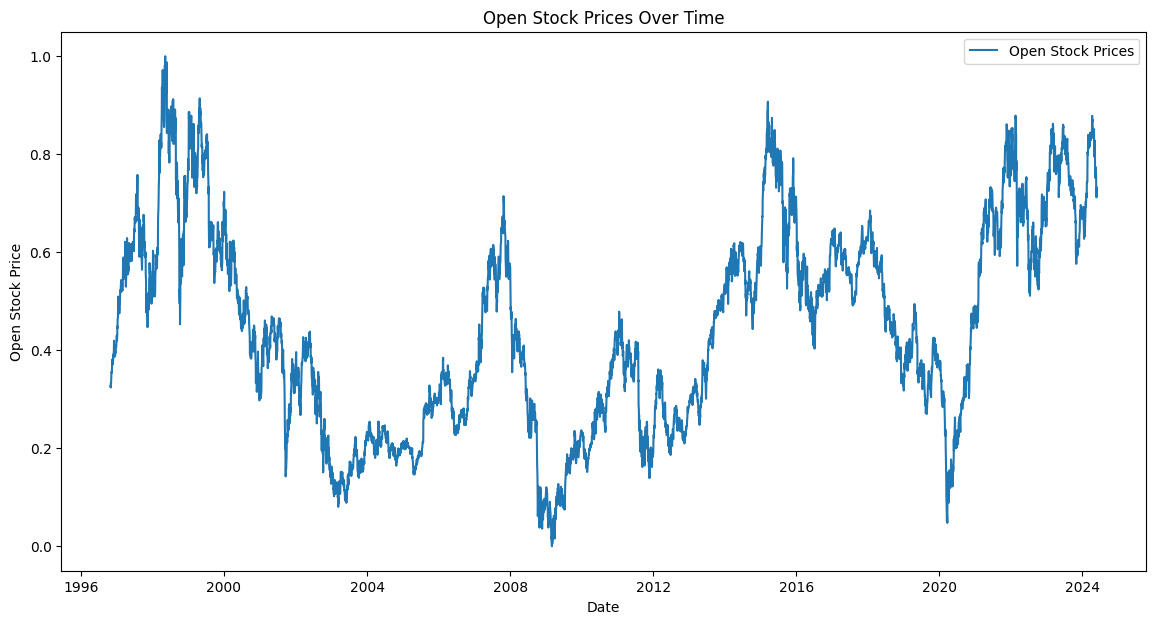

In [186]:
data.visualize_open()

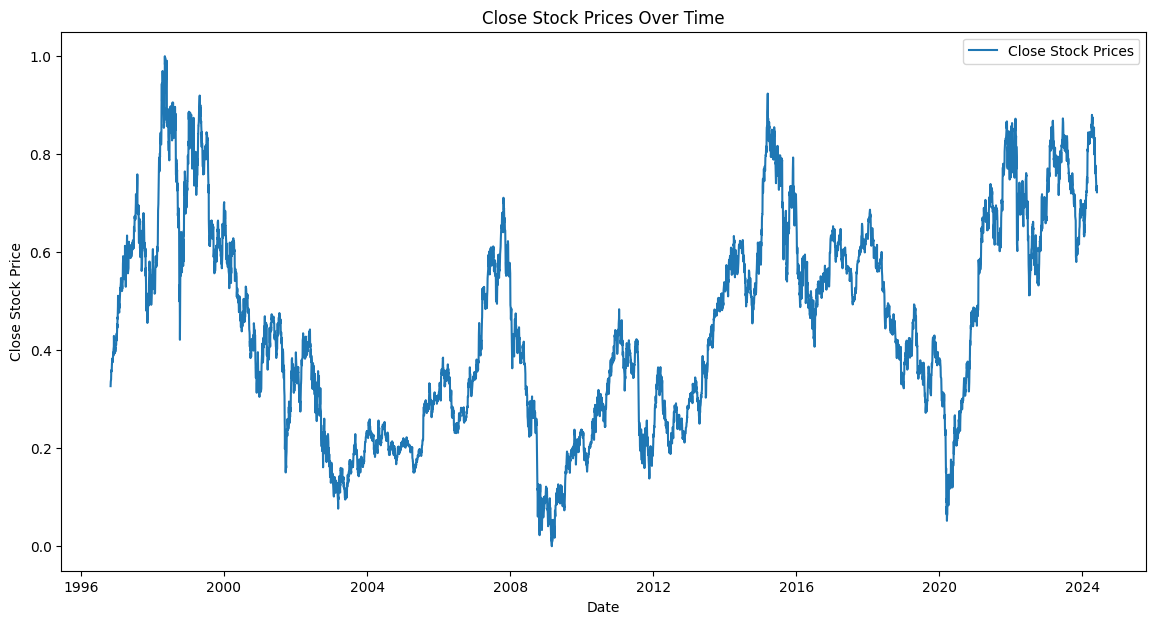

In [187]:
data.visualize_close()

In [191]:
class model_train_seq_LSTM :

    def __init__(self, dataframe, scaler) :
        self.dataframe = dataframe
        self.scaler = scaler

    def prep_data_lstm(self, feature_col = 'Close', look_back = 60) :   #"look back" refers to the number of previous time steps that the model uses to make predictions for the next time step.
        """Prepare data for LSTM by creating sequences"""
        data = self.dataframe[feature_col].values     # Extract the feature column values
        data = data.reshape(-1, 1)  # Reshape to (n_samples, 1)
        X, y = [], []
        for i in range(len(data) - look_back):
            X.append(data[i:i + look_back])     # Append sequences of length 'look_back'
            y.append(data[i + look_back])       # Append the next value as the target
        X, y = np.array(X), np.array(y)
        # Split data while preserving the number of features
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = False)
        return X_train, X_test, y_train, y_test.reshape(-1, 1)

    def build_train_lstm(self, feature_col = 'Close', look_back = 60, epochs = 100, batch_size = 32):
        """Build and train the LSTM model"""
        X_train, X_test, y_train, y_test = self.prep_data_lstm(feature_col, look_back)

        model = sq()    # Initialize the model
        model.add(LSTM(units = 50, return_sequences = True, input_shape = (look_back, 1)))
        model.add(LSTM(units = 50))   #this layer does not have return_sequences=True, which means it will only return the final output of the sequence, not the full sequence.
        model.add(Dense(1))     #This is the output layer of the model. Since we are predicting a single value (the next day's stock price), this layer has one neuron.

        #LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)) adds an LSTM layer to the model.
        #50 is the number of units in this LSTM layer, which means the layer will have 50 LSTM cells.
        #return_sequences=True means this layer will return the full sequence of outputs for each input sequence, not just the final output. This is necessary because we are stacking another LSTM layer on top.
        #input_shape=(X_train.shape[1], 1) specifies the shape of the input data for this layer.
        #X_train.shape[1] is the number of time steps (look-back period), and 1 is the number of features (since we are using just one feature, the stock price).

        model.compile(optimizer = 'adam', loss = 'mean_squared_error')     # Compile the model using Adam optimizer and mean squared error loss

         # Train the model with the training data
        model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data = (X_test, y_test))

        self.model = model    # Save the trained model
        self.X_test = X_test  # Save the test features
        self.y_test = y_test  # Save the test targets


    def predict_plot(self):
        """Make predictions and plot the results"""
        predictions = self.model.predict(self.X_test)   # Predict the test data
        predictions = predictions.reshape(-1, 1)    # Reshape the predictions

        # Extract the 'Close' column from the original dataframe
        self.close_scaler = MM(feature_range = (0, 1))  # Create a new scaler for just the 'Close' column
        self.close_scaler.fit(self.dataframe['Close'].values.reshape(-1, 1))  # Fit the scaler to the 'Close' column

        # Inverse transform predictions using the scaler fitted on 'Close' column
        predictions = self.close_scaler.inverse_transform(predictions)
        # Inverse transform actual 'Close' values
        actual = self.close_scaler.inverse_transform(self.y_test)

        plt.figure(figsize = (14, 7))
        plt.plot(actual, label = 'Actual Stock Price')
        plt.plot(predictions, label = 'Predicted Stock Price')
        plt.title('Actual vs Predicted Stock Prices')
        plt.xlabel('Time')
        plt.ylabel('Stock Price')
        plt.legend()
        plt.show()


    def evaluate_model(self):
        """Calculates and prints evaluation metrics."""
        predictions = self.model.predict(self.X_test)   # Predict the test data
        predictions = self.close_scaler.inverse_transform(predictions)    # Inverse transform predictions
        actual = self.close_scaler.inverse_transform(self.y_test)      # Inverse transform actual values; inverse transform = Inverse transform is the process of converting the model's scaled predictions back to their original scale (e.g., actual stock prices) using the same scaler that was used to normalize the data, making the results interpretable and comparable to the original data.

        mse = MSE(actual, predictions)
        rmse = np.sqrt(mse)
        mae = MAE(actual, predictions)
        r2 = r2_score(actual, predictions)

        print(f"Mean Squared Error (MSE): {mse}")
        print(f"Root Mean Squared Error (RMSE): {rmse}")
        print(f"Mean Absolute Error (MAE): {mae}")
        print(f"R-squared (R2): {r2}")

In [192]:
trainer = model_train_seq_LSTM(data.dataframe, data.scaler)

In [193]:
trainer.build_train_lstm(feature_col = 'Close', look_back = 60, epochs = 100, batch_size = 32)

Epoch 1/100
176/176 [==============================] - 16s 70ms/step - loss: 0.0064 - val_loss: 0.0011
Epoch 2/100
176/176 [==============================] - 13s 74ms/step - loss: 8.2171e-04 - val_loss: 0.0012
Epoch 3/100
176/176 [==============================] - 11s 63ms/step - loss: 7.2052e-04 - val_loss: 8.1869e-04
Epoch 4/100
176/176 [==============================] - 9s 52ms/step - loss: 6.9019e-04 - val_loss: 7.8132e-04
Epoch 5/100
176/176 [==============================] - 11s 60ms/step - loss: 6.1086e-04 - val_loss: 6.4223e-04
Epoch 6/100
176/176 [==============================] - 11s 60ms/step - loss: 5.0869e-04 - val_loss: 6.4169e-04
Epoch 7/100
176/176 [==============================] - 11s 60ms/step - loss: 4.6764e-04 - val_loss: 5.3842e-04
Epoch 8/100
176/176 [==============================] - 10s 56ms/step - loss: 3.9161e-04 - val_loss: 5.7786e-04
Epoch 9/100
176/176 [==============================] - 10s 57ms/step - loss: 3.5373e-04 - val_loss: 3.7332e-04
Epoch 10/100
1

44/44 [==============================] - 1s 15ms/step


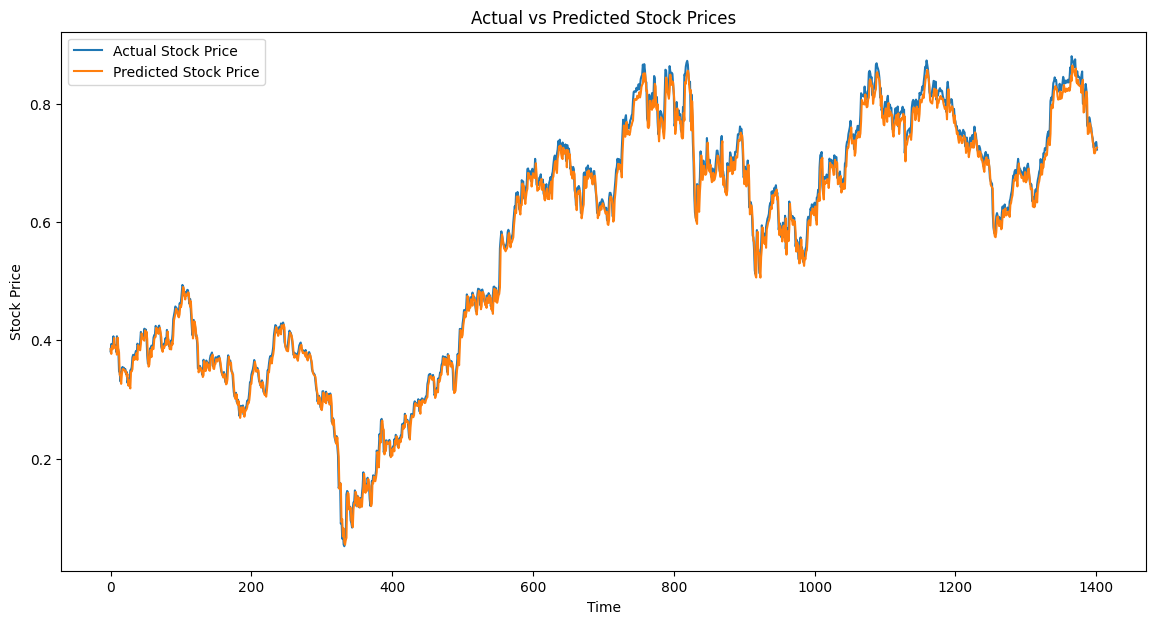

In [194]:
trainer.predict_plot()

In [195]:
trainer.evaluate_model()

44/44 [==============================] - 1s 15ms/step
Mean Squared Error (MSE): 0.0002882336855381641
Root Mean Squared Error (RMSE): 0.016977446378597816
Mean Absolute Error (MAE): 0.012845653583689299
R-squared (R2): 0.9931638498670343
